install hmmlearn

In [1]:
!pip install hmmlearn


import everything

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

plt.rcParams['figure.figsize'] = (12, 5)


head returns

In [3]:
returns = pd.read_csv("../data/returns.csv", index_col=0, parse_dates=True)
returns.head()


,SPY,TLT,GLD
Date,,,
2015-01-05,-0.018225,0.015586,0.014965
2015-01-06,-0.009464,0.017856,0.011334
2015-01-07,0.012384,-0.001976,-0.005909
2015-01-08,0.017589,-0.013331,-0.004217
2015-01-09,-0.008046,0.010893,0.011321


find regimes for spy

In [4]:
import numpy as np
from hmmlearn.hmm import GaussianHMM

# Use SPY only for first model
X = returns[["SPY"]].fillna(0).values  # (n_samples, 1)

# Create and fit HMM with 3 regimes
hmm = GaussianHMM(n_components=3, covariance_type="full", n_iter=500, random_state=42)
hmm.fit(X)

# Predict hidden states
states = hmm.predict(X)

# Add to DataFrame
ret2 = returns.copy()
ret2["Regime"] = states
ret2.head()


Model is not converging.  Current: 8735.777359318845 is not greater than 8735.784211641929. Delta is -0.006852323083876399


,SPY,TLT,GLD,Regime
Date,,,,
2015-01-05,-0.018225,0.015586,0.014965,2
2015-01-06,-0.009464,0.017856,0.011334,2
2015-01-07,0.012384,-0.001976,-0.005909,2
2015-01-08,0.017589,-0.013331,-0.004217,0
2015-01-09,-0.008046,0.010893,0.011321,1


plot regimes

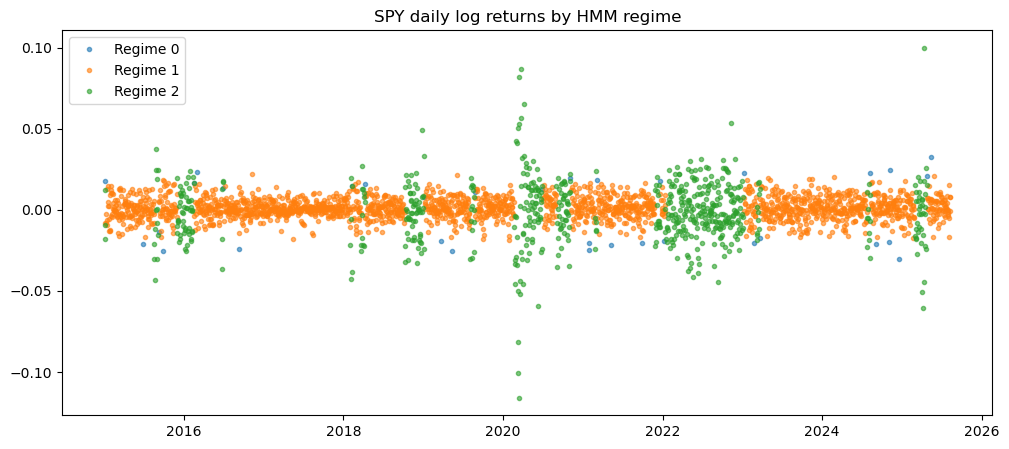

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for s in sorted(ret2["Regime"].unique()):
    mask = ret2["Regime"] == s
    plt.plot(ret2.index[mask], ret2["SPY"][mask], ".", alpha=0.6, label=f"Regime {s}")

plt.title("SPY daily log returns by HMM regime")
plt.legend()
plt.show()


summarize regime stats

In [6]:
summary = ret2.groupby("Regime")["SPY"].agg(["mean", "std", "count"]).sort_index()
summary


,mean,std,count
Regime,,,
0,-0.000987,0.020784,33
1,0.001167,0.006405,2003
2,-0.001578,0.019719,629


saves figure

'../figures/phase2_spy_regimes.png'

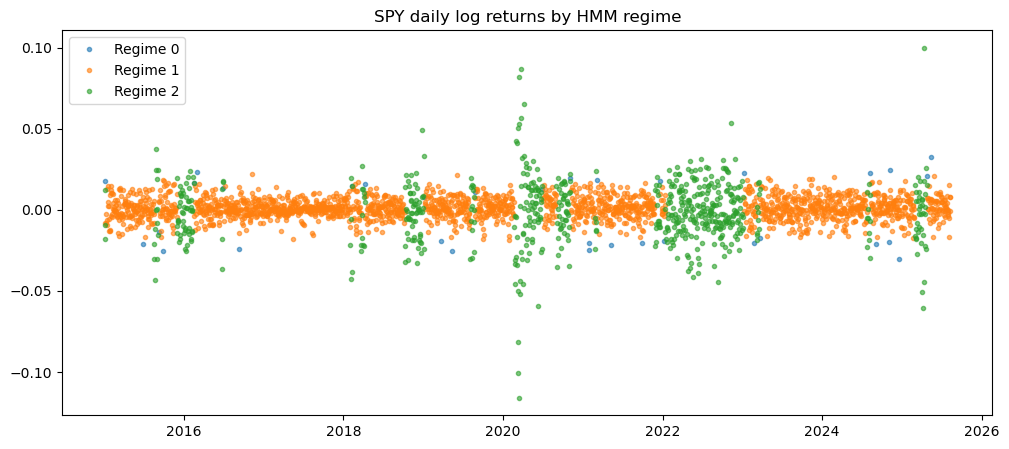

In [7]:
figpath = "../figures/phase2_spy_regimes.png"
plt.figure(figsize=(12,5))
for s in sorted(ret2["Regime"].unique()):
    mask = ret2["Regime"] == s
    plt.plot(ret2.index[mask], ret2["SPY"][mask], ".", alpha=0.6, label=f"Regime {s}")
plt.title("SPY daily log returns by HMM regime")
plt.legend()
plt.savefig(figpath, bbox_inches="tight", dpi=150)
figpath


saves labeled returns

In [8]:
ret2.to_csv("../data/returns_with_regimes.csv")
